<a href="https://colab.research.google.com/github/msebbah/rapids_performances/blob/main/rapids_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Sanity Check #

Click the _Runtime_ dropdown at the top of the page, then _Change Runtime Type_ and confirm the instance type is _GPU_.

Check the output of `!nvidia-smi` to make sure you've been allocated a Tesla T4, P4, or P100.

In [ ]:
!nvidia-smi

#Setup:
Set up script installs
1. Install most recent Miniconda release compatible with Google Colab's Python install  (3.6.7)
1. removes incompatible files
1. Install RAPIDS 0.14 libraries including:
  1. cuDF
  1. cuML
  1. cuGraph
  1. cuSpatial
  1. cuSignal
  1. xgboost and dask-xgboost
1. Set necessary environment variables
1. Copy RAPIDS .so files into current working directory, a workaround for conda/colab interactions
1. If running v0.11 or higher, updates pyarrow library to 0.15.x.

In [ ]:
# Install RAPIDS
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh stable

import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.6/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.6/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

# Estimate Pi with a Monte-Carlo method
The idea is to simulate random (x, y) points in a 2-D plane with domain as a square of side 1 unit. Imagine a circle inside the same domain with same diameter and inscribed into the square. We then calculate the ratio of number points that lied inside the circle and total number of generated points. 

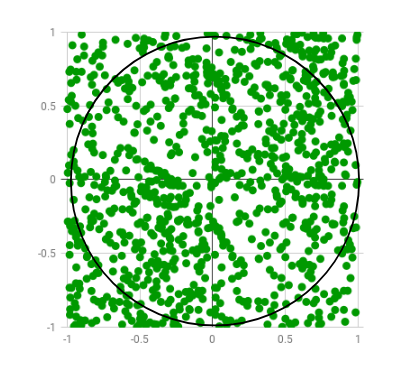


In [ ]:
import numpy as np
import cupy as cp
N=10**7


# With Numpy:

In [ ]:
%%timeit
x = np.random.rand(N)
y = np.random.rand(N)
pi = np.sum(x**2 + y**2 <= 1) /N*4

1 loop, best of 3: 258 ms per loop


# With Cupy:

In [ ]:
%%timeit
x = cp.random.rand(N)
y = cp.random.rand(N)
pi = cp.sum(x**2 + y**2 <= 1) /N*4

100 loops, best of 3: 18.7 ms per loop


# Conclusion
Rapids cupy is 12 times faster than Numpy to estimate the value of Pi in a Google Colab instance.